<a href="https://colab.research.google.com/github/Dheemant-Dixit/WoC-ML-Bootcamp/blob/main/NeuralNetworkClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Neural Network for Regression**
*From scratch using Python*

Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

### Importing necessary libraries:
Numpy, pandas and matplotlib.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

### Using Google Drive Mount to access dataset files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Data Frame

The famous library 'pandas' is used to load the data frame from the csv files provided.

Data Frame for training dataset.

In [ ]:
pd.options.display.max_columns = 40
df_train = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Logistic Regression/emnist-letters-train.csv', header = None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Data Frame for testing dataset.

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Logistic Regression/emnist-letters-test.csv', header = None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


An array of alphabets with 'A' at index 0 and 'Z' at index 25 to better understand which alphabet is being shown and predicted.

In [ ]:
alphabets=np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])

## Visualising the data
We'll map the pixel brightness with the help of matplotlib and create the image of the alphabets on a graph.

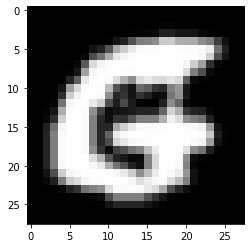

In [ ]:
n=df_train.shape[1]
pixels=(df_train.iloc[1:2,1:n]).to_numpy()
pixels = pixels.reshape((28, 28))
pixels = pixels.T
plt.imshow(pixels, cmap='gray')
plt.show()

## Converting the Data Frame to NumPy Arrays

Using the function `.to_numpy()` to conver the Data Frame to numpy array and then slicing the array to separate features from the label.

`X_train` --> Array with all features of training dataset.

`Y_train` --> Array with all labels of training dataset.

`X_test` --> Array with all features of testing dataset.

`Y_test` --> Array with all labels of testing dataset.

In [ ]:
X_train = df_train.to_numpy()
Y_train = X_train[:, 0]
Y_train = Y_train.reshape(Y_train.shape[0],1)
X_train = X_train[:, 1:X_train.shape[1]]

In [ ]:
X_test = df_test.to_numpy()
Y_test = X_test[:, 0]
Y_test = Y_test.reshape(Y_test.shape[0],1)
X_test = X_test[:, 1:X_test.shape[1]]

Defining a function `plot` which will be used to map the brightness of the pixels onto a graph thus showing the alphabet.

In [ ]:
def plot(X):
    pixels = X.reshape((28, 28))
    pixels = pixels.T
    plt.imshow(pixels, cmap='gray')
    plt.show()

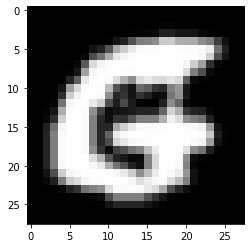

This is G


In [ ]:
n=X_train.shape[1]
a = 1
pixels= X_train[a:a+1, :]
plot(pixels)
print('This is', alphabets[Y_train[a]-1][0])

In [ ]:
print(np.unique(Y_train))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]


## Normalising the Data:
The maximum pixel brightness is 255 and the minimum us 0. So we'll divide the whole array by 255 to get all the entries between 0 and 1.

In [ ]:
def normalise(X):
    result = X/255
    return result

## Abstract Base Class : Layer

The abstract class Layer, which all other layers will inherit from, handles simple properties which are an input, an output, and both a forward and backward methods.

In [ ]:
# Base class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

## Fully Connected Layer

FC layers are the most basic layers as every input neurons are connected to every output neurons.

### Forward Propogation:

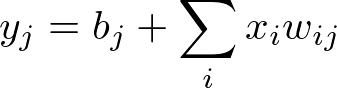

### Backward Propogation:

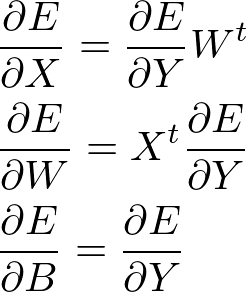

In [ ]:
# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

## Activation Layer

In [ ]:
# inherit from base class Layer
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [ ]:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

## Loss Function

Mean-Squared Error is used as the Cost function.

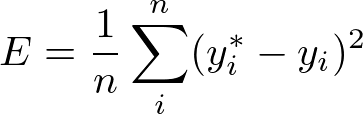

In [ ]:
# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

## Network Class

In [ ]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

## Data Pre-processing

In [ ]:
x_train = X_train
x_train = x_train.reshape(X_train.shape[0], 1, 28*28)

y_train = np.empty((Y_train.shape[0], len(np.unique(Y_train))))
for i in range(Y_train.shape[0]):
    y_train[i] = np.zeros((y_train.shape[1]))
    y_train[i, Y_train[i]-1] = 1

In [ ]:
x_test = X_test
x_test = x_test.reshape(X_test.shape[0], 1, 28*28)

y_test = np.empty((Y_test.shape[0], len(np.unique(Y_train))))
for i in range(Y_test.shape[0]):
    y_test[i] = np.zeros((y_test.shape[1]))
    y_test[i, Y_test[i]-1] = 1

## Normalising the Data

In [ ]:
x_train = normalise(x_train)
x_test = normalise(x_test)

## Creating a Neural Network

The neural network will have 2 Hidden layers, having 100 and 50 neurons each, one Input layer and one Output layer.

Sigmoid will be used as the activation function.

In [ ]:
net = Network()
net.add(FCLayer(28*28, 100))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(100, 50))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(50, 26))
net.add(ActivationLayer(sigmoid, sigmoid_prime))

### Fitting the Training Dataset

In [ ]:
net.use(mse, mse_prime)
net.fit(x_train, y_train, epochs=35, learning_rate=0.5)

epoch 1/35   error=0.025587
epoch 2/35   error=0.015742
epoch 3/35   error=0.013015
epoch 4/35   error=0.011471
epoch 5/35   error=0.010408
epoch 6/35   error=0.009622
epoch 7/35   error=0.008963
epoch 8/35   error=0.008394
epoch 9/35   error=0.007952
epoch 10/35   error=0.007592
epoch 11/35   error=0.007291
epoch 12/35   error=0.007034
epoch 13/35   error=0.006811
epoch 14/35   error=0.006615
epoch 15/35   error=0.006440
epoch 16/35   error=0.006281
epoch 17/35   error=0.006137
epoch 18/35   error=0.006004
epoch 19/35   error=0.005881
epoch 20/35   error=0.005766
epoch 21/35   error=0.005659
epoch 22/35   error=0.005558
epoch 23/35   error=0.005462
epoch 24/35   error=0.005371
epoch 25/35   error=0.005284
epoch 26/35   error=0.005202
epoch 27/35   error=0.005123
epoch 28/35   error=0.005048
epoch 29/35   error=0.004976
epoch 30/35   error=0.004908
epoch 31/35   error=0.004843
epoch 32/35   error=0.004781
epoch 33/35   error=0.004721
epoch 34/35   error=0.004665
epoch 35/35   error=0.0

### Predicting for the Testing Dataset

In [ ]:
out = net.predict(x_test)
out_arr = np.array(out)

In [ ]:
out_arr = out_arr.reshape((X_test.shape[0], 26))
extre = np.argmax(out_arr, axis=1)
extre+=1

In [ ]:
print(extre)

[ 1  1  1 ... 19 19 19]


## Accuracy of the Neural Network Model:

In [ ]:
score = 0
for i in range(X_test.shape[0]):
    if extre[i]==Y_test[i]:
        score+=1

print("No. of test examples predicted correctly =",score)
print(f"Accuracy = {score/X_test.shape[0]*100}%")

No. of test examples predicted correctly = 12656
Accuracy = 85.51351351351352%
